In [15]:
import os
import numpy as np
import splitfolders
import matplotlib.pyplot as plt
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications import ResNet50, ResNet50V2, VGG16, MobileNetV2

In [3]:

batch_size = 32
img_height = 128
img_width = 128

dataset_path = "/Users/nana/.cache/kagglehub/datasets/feyzazkefe/trashnet/versions/1/dataset-resized"

# Load training dataset (80% of data)
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load validation/test dataset (20% of data)
temp_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Split temp_ds into validation and test datasets
val_size = int(0.5*len(temp_ds))

val_ds = temp_ds.take(val_size)
test_ds = temp_ds.skip(val_size)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [5]:
for images, labels in train_ds.take(1):  # Take one batch
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Labels:", labels.numpy())  

Image batch shape: (32, 128, 128, 3)
Label batch shape: (32,)
Labels: [4 0 2 0 0 3 3 3 2 3 1 1 3 3 3 0 2 2 4 3 4 4 1 2 3 3 0 4 2 2 3 4]


2025-02-14 11:56:35.111044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


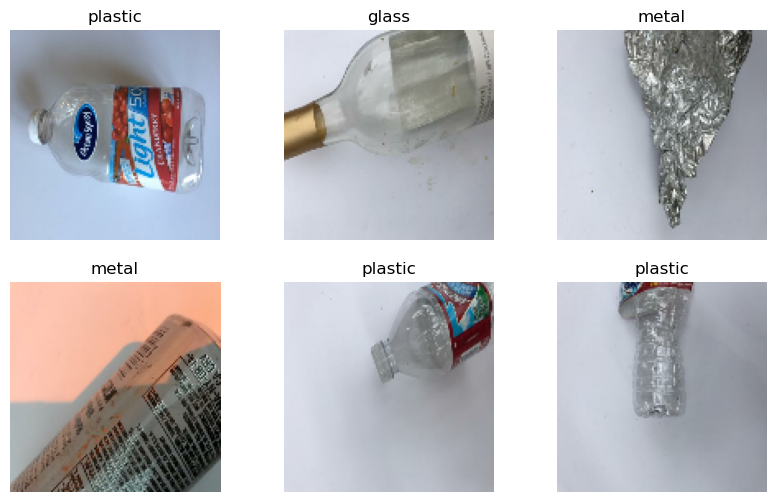

2025-02-14 12:09:58.725197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
for images, labels in train_ds.take(1):  # Take one batch
    plt.figure(figsize=(10, 6))
    for i in range(6):  # Show 9 images
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [16]:
input_tensor = Input(shape=(128, 128, 3))
mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=input_tensor)

x = GlobalAveragePooling2D()(mobilenet.output)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
num_classes = 6
out = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=out)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), 
              loss='SparseCategoricalCrossentropy', 
              metrics=['accuracy'])

/var/folders/sr/4rmb3s196mnb692nc04m_g1h0000gn/T/ipykernel_8689/3625479604.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=input_tensor)


In [18]:
#lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7,verbose = 1)
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=100,
                    steps_per_epoch=len(train_ds)//batch_size,
                    validation_steps=len(val_ds)//batch_size
                    #callbacks=[lr_scheduler,early_stopping]
                    )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step - accuracy: 0.6771 - loss: 0.7806 - val_accuracy: 0.3477 - val_loss: 1.7475
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8021 - loss: 0.8398 - val_accuracy: 0.3477 - val_loss: 1.7258
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6771 - loss: 0.8541 - val_accuracy: 0.3672 - val_loss: 1.6864
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6458 - loss: 0.9163 - val_accuracy: 0.3359 - val_loss: 1.7130
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 0.6146 - loss: 1.1595 - val_accuracy: 0.3672 - val_loss: 1.6995
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step - accuracy: 0.6250 - loss: 0.9889 - val_accuracy: 0.3711 - val_loss: 1.6044
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - accuracy: 0.7292 - loss: 0.8205 - val_accuracy: 0.3984 - val_loss: 1.6424
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.2509 - val_accuracy: 0.3750 - val_loss: 1.6

2025-02-14 12:49:50.161875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3828 - val_loss: 1.7824
Epoch 34/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step - accuracy: 0.7604 - loss: 0.8820 - val_accuracy: 0.3984 - val_loss: 1.7373
Epoch 35/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step - accuracy: 0.7708 - loss: 0.6912 - val_accuracy: 0.4258 - val_loss: 1.6196
Epoch 36/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7188 - loss: 0.7636 - val_accuracy: 0.3945 - val_loss: 1.7484
Epoch 37/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7083 - loss: 0.8228 - val_accuracy: 0.4375 - val_loss: 1.7070
Epoch 38/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step - accuracy: 0.7500 - loss: 0.6974 - val_accuracy: 0.4336 - val_loss: 1.7310
Epoch 39/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step - accuracy: 0.7500 - loss: 0.8140 - val_accuracy: 0.4297 - val_loss: 1.5947
Epoch 40/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6042 - loss: 0.9963 - val_accuracy: 0.4180 - val_los

2025-02-14 12:50:34.479417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4688 - val_loss: 1.5883
Epoch 67/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step - accuracy: 0.8021 - loss: 0.5139 - val_accuracy: 0.4727 - val_loss: 1.6722
Epoch 68/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - accuracy: 0.8333 - loss: 0.5002 - val_accuracy: 0.5078 - val_loss: 1.5169
Epoch 69/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8229 - loss: 0.5939 - val_accuracy: 0.5117 - val_loss: 1.4394
Epoch 70/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7292 - loss: 0.6635 - val_accuracy: 0.5039 - val_loss: 1.5346
Epoch 71/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8854 - loss: 0.2722 - val_accuracy: 0.4688 - val_loss: 1.6161
Epoch 72/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 0.7083 - loss: 0.7963 - val_accuracy: 0.4844 - val_loss: 1.6158
Epoch 73/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step - accuracy: 0.8125 - loss: 0.4857 - val_accuracy: 0.5078 - val_los

2025-02-14 12:51:18.866274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 1.2952
Epoch 100/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step - accuracy: 0.8229 - loss: 0.4498 - val_accuracy: 0.5938 - val_loss: 1.3850


In [21]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7,verbose = 1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=100,
                    steps_per_epoch=len(train_ds)//batch_size,
                    validation_steps=len(val_ds)//batch_size,
                    callbacks=[lr_scheduler]
                    )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7396 - loss: 0.7729 - val_accuracy: 0.5938 - val_loss: 1.3014 - learning_rate: 1.0000e-07
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step - accuracy: 0.8854 - loss: 0.3738 - val_accuracy: 0.5547 - val_loss: 1.3403 - learning_rate: 1.0000e-07
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8229 - loss: 0.5355 - val_accuracy: 0.5352 - val_loss: 1.3601 - learning_rate: 1.0000e-07
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8854 - loss: 0.3660 - val_accuracy: 0.6016 - val_loss: 1.3088 - learning_rate: 1.0000e-07
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8229 - loss: 0.4275 - val_accuracy: 0.5742 - val_loss: 1.3322 - learning_rate: 1.0000e-07
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8646 - loss: 0.3992 - val_accuracy: 0.5703 - val_loss: 1.3633 - learning_rate: 1.0000e-07
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8021 - loss: 0.5403 - v

2025-02-14 13:35:43.296342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5977 - val_loss: 1.2764 - learning_rate: 1.0000e-07
Epoch 34/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step - accuracy: 0.8229 - loss: 0.3584 - val_accuracy: 0.6055 - val_loss: 1.1933 - learning_rate: 1.0000e-07
Epoch 35/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8542 - loss: 0.4885 - val_accuracy: 0.6016 - val_loss: 1.2906 - learning_rate: 1.0000e-07
Epoch 36/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9167 - loss: 0.3610 - val_accuracy: 0.6289 - val_loss: 1.1453 - learning_rate: 1.0000e-07
Epoch 37/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 0.8542 - loss: 0.4670 - val_accuracy: 0.5977 - val_loss: 1.2765 - learning_rate: 1.0000e-07
Epoch 38/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step - accuracy: 0.8542 - loss: 0.3817 - val_accuracy: 0.6250 - val_loss: 1.2060 - learning_rate: 1.0000e-07
Epoch 39/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9062 - loss:

2025-02-14 13:36:27.830844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6445 - val_loss: 1.1482 - learning_rate: 1.0000e-07
Epoch 67/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step - accuracy: 0.7812 - loss: 0.5539 - val_accuracy: 0.6211 - val_loss: 1.2719 - learning_rate: 1.0000e-07
Epoch 68/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8854 - loss: 0.3228 - val_accuracy: 0.6562 - val_loss: 1.0346 - learning_rate: 1.0000e-07
Epoch 69/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step - accuracy: 0.8542 - loss: 0.5846 - val_accuracy: 0.6367 - val_loss: 1.2355 - learning_rate: 1.0000e-07
Epoch 70/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step - accuracy: 0.8021 - loss: 0.5538 - val_accuracy: 0.6328 - val_loss: 1.2845 - learning_rate: 1.0000e-07
Epoch 71/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - accuracy: 0.8750 - loss: 0.4339 - val_accuracy: 0.6328 - val_loss: 1.1379 - learning_rate: 1.0000e-07
Epoch 72/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - accuracy: 0.9375 -

2025-02-14 13:37:12.106618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6680 - val_loss: 1.0320 - learning_rate: 1.0000e-07
Epoch 100/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step - accuracy: 0.7708 - loss: 0.5678 - val_accuracy: 0.6523 - val_loss: 1.1193 - learning_rate: 1.0000e-07
